- [Chapter 3: Probability mass functions](#chapter3)
    - [3.1 PMFs](#subchapter3.1)
    - [3.2 Plotting PMFs](#subchapter3.2)
    - [3.3 Other visualizations](#subchapter3.3)
    - [3.4 The class size paradox](#subchapter3.4)
    - [3.5 DataFrame indexing](#subchapter3.5)
    - [3.6 Exercises](#subchapter3.6)
    - [3.7 Glossary](#subchapter3.7)

<a id='chapter3'></a>
# Chapter 3: Probability mass functions

In [2]:
from __future__ import print_function

import math
import numpy as np
import pandas as pd

import nsfg
import first
import thinkstats2
import thinkplot

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<a id='subchapter3.1'></a>
## 3.1 PMFs

Another way to represent a distribution is a Probability mass function, which maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we devide through by n, which is called normalization.

Given a hist, we can make a dictionary that maps from each value to its probability: 

In [2]:
# pmf is actually a dictionary that maps a value to its frequency/total values 
# it is calculated and created this way:
'''
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n
'''

'\nn = hist.Total()\nd = {}\nfor x, freq in hist.Items():\n    d[x] = freq / n\n'

Or we can use the PMF class provided by thinkstats2. Like Hist, the PMF constructor can take a list, pandas Series, dictionary, Hist, or another PMF object. 

Here's an example with a simple list:

In [3]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

The Pmf is normalized so total probability is 1. 

Pmf and Hist objects are similar in many ways. In fact, they inherit many of their methods from a common parent class. For example, the methods Values and Items work the same for both. The biggest difference is that Hist maps from values to integer counters. A Pmf maps from values to floating point probabilities. 

To look up the probability associated with the value, use Prob:

In [4]:
# What is the probability of 2?
pmf.Prob(2)
# or:
pmf[2]

0.4

You can modify an existing Pmf by incrementing the probability associated with a value:

In [5]:
# increment the probability of 2 by 0.2
pmf.Incr(2, 0.2)
pmf

Pmf({1: 0.2, 2: 0.6000000000000001, 3: 0.2, 5: 0.2})

In [6]:
pmf.Prob(2)

0.6000000000000001

Or you can multiply a probatility by a factor:

In [7]:
pmf.Mult(2, 0.5)
pmf

Pmf({1: 0.2, 2: 0.30000000000000004, 3: 0.2, 5: 0.2})

In [8]:
pmf[2]

0.30000000000000004

If you modify a Pmf, the result may not be normalized. To check, use Total:

In [9]:
pmf.Total()

0.8999999999999999

To normalize, call Normalize:

In [10]:
pmf.Normalize()
pmf.Total()

1.0

<a id='subchapter3.2'></a>
## 3.2 Plotting PMFs

There are two methods used in the book to plot Pmf: 
- <b>thinkplot.Hist</b> is used to create a bar graph (useful when the number of values in the Pmf is smalle).
- <b>thinkplot.Pmf</b> is used to create a step function (useful when there are large numbers of values and the Pmf is smooth). This function also works Hist objects.

In addition, <b>pyplot.hist</b> provides a function called hist the takes a sequence of values, computes a histogram, and plots it.

In [11]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
first_babies = live[live.birthord == 1]
other_babies = live[live.birthord != 1]

In [12]:
first_pmf = thinkstats2.Pmf(first_babies.prglngth)
other_pmf = thinkstats2.Pmf(other_babies.prglngth)
type(first_pmf)

thinkstats2.Pmf

PrePlot takes optional parameters rows and cols to make a grid of figures, in this case one row of two figures. The first figure, on the left, displays the Pmfs using thinkplot.Hist, as we have seen before. 

The second call to PrePlot resets the color generator: The SubPlot switches to the second figure (on the right) and displays the Pmfs using thinkplot.Pmfs.

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


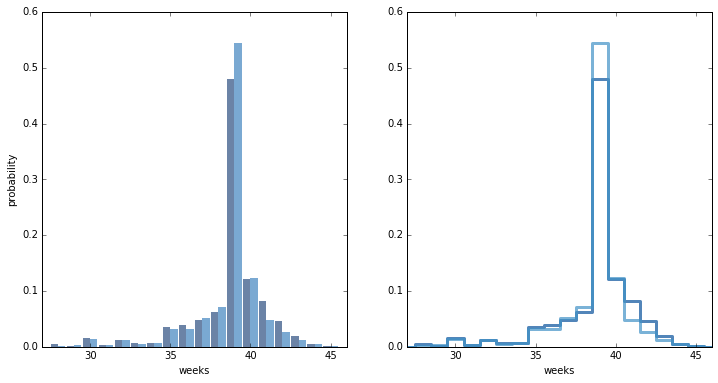

In [14]:
width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
# The axis option ensures that the two figures are on the same axes
# this is important if we want to compare the figures
thinkplot.Config(xlabel='weeks',
                ylabel='probability',
                axis=[27,46,0,0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',
              axis=[27,46,0,0.6])

<a id='subchapter3.3'></a>
## 3.3 Other visualizations

In the NSFG data, the biggest differences in the distributions are near the mode. Let's zoom in on that part of the graph, and transform the data to emphasize differences:

In [17]:
# weeks = range of weeks
weeks = range(35, 46)
# diffs = difference between pmfs in %
diffs = []
for week in weeks: 
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

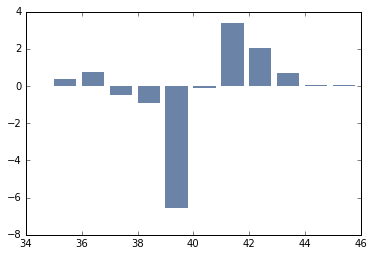

In [18]:
thinkplot.Bar(weeks, diffs)

The result shows a pattern: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41-42. 

This is not a clear conclusion for the question. Note that we used the same dataset to identify an apparent difference and then chose a visualization that makes the difference apparent. We can't be sure this effect is real. It might be due to random variation (we'll adress this later). 

<a id='subchapter3.4'></a>
## 3.4 The class size paradox

Another computation you can do with pmf is referred to by the author as "The class size paradox", and it is explained [here](http://www.umasocialmedia.com/socialnetworks/glossary/class-size-paradox/). 

Let's look at the computations behind this paradox.

For example, here are the classes sizes and number of classes:

In [19]:
data_dict = {'Class size': ['5-9', '10-14', '15-19', '20-24',
                    '25-29', '30-34', '35-39', '40-44', '45-49'],
            'Num of classes': [8, 8, 14, 4, 6, 12, 8, 3, 2]}
df = pd.DataFrame(data_dict)
df.set_index('Class size', inplace=True)
df

,Num of classes
Class size,
5-9,8
10-14,8
15-19,14
20-24,4
25-29,6
30-34,12
35-39,8
40-44,3
45-49,2


The administration of the school in our example will compute the mean, and report that the average class size is 23.7:

In [53]:
d = {7:8, 12:8, 17:14, 22:4, 
    27:6, 32:12, 37:8, 42:3, 47:2}
pmf =  thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.6923076923


However, if you survey a group of students and ask them how many students are in their class, the answer will be bigger. 

Here is the computation that shows why: 

In [54]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        # for each class size we multiply the number of students 
        # by x --> the number of students who observed that class size
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

Let's plot this observed mean:

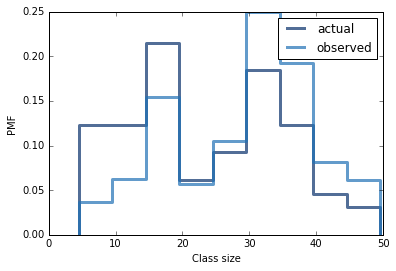

In [56]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='Class size', ylabel='PMF')

As we can see in this plot, in the biased distribution there are fewer small classes and more large ones. The mean of the biased distribution is 29.1, almost 25% higher than the actual mean.

If you choose x random students and ask them about the observed class size you will be facing the exact problem we see above. Here is the function the unbiases a Pmf:

In [60]:
def UnBiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        # devides each probability by x instead of multiplying
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf

<a id='subchapter3.5'></a>
## 3.5 DataFrame indexing

In section [1.4](chap01.ipynb) we read a panda DataFrame and used it to select and modify data columns. Now let's look at row selection. 

In [3]:
# we already imported numpy and pandas in the begining of this chapter
array = np.random.randn(4,2)
array

array([[-0.75105066, -0.19820176],
       [ 1.91521304, -1.72859852],
       [-0.79385791, -1.04171821],
       [-0.68112962, -0.57233407]])

In [4]:
df = pd.DataFrame(array)
df

,0,1
0,-0.751051,-0.198202
1,1.915213,-1.728599
2,-0.793858,-1.041718
3,-0.681130,-0.572334


In [24]:
# by default rows and colums are numbered 
# however, you can provide a column name
columns = ['A', 'B']
# note that row names are called labels
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.751051,-0.198202
b,1.915213,-1.728599
c,-0.793858,-1.041718
d,-0.681130,-0.572334


In [25]:
# simple indexing selects a column and returns a series
df['A']

a   -0.751051
b    1.915213
c   -0.793858
d   -0.681130
Name: A, dtype: float64

In [26]:
type(df['A'])

pandas.core.series.Series

In [34]:
# to select a row by label you can use the loc attribute
df.loc['a']

A   -0.751051
B   -0.198202
Name: a, dtype: float64

In [36]:
# if you know the index position of the row, use iloc
df.iloc[0]

A   -0.751051
B   -0.198202
Name: a, dtype: float64

In [38]:
# using a list of labels with loc will result in a DataFrame
indices = ['b', 'c']
df.loc[indices]

,A,B
b,1.915213,-1.728599
c,-0.793858,-1.041718


In [39]:
# you can use a slice to select a range of rows by label
# this notation will include the end of the slice
df.loc['a':'c']

,A,B
a,-0.751051,-0.198202
b,1.915213,-1.728599
c,-0.793858,-1.041718


In [42]:
# or by integer position
# this notation will not include the end of the slice
df.iloc[1:3]

,A,B
b,1.915213,-1.728599
c,-0.793858,-1.041718


<a id='subchapter3.6'></a>
## 3.6 Exercises

Open the exercises in the links below. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises you should try.

<b>Exercise 3.1</b>

[Exercise 1](chap03ex01.ipynb)

[Exercise 1 solution](chap03ex01soln.ipynb)

<b>Exercise 3.2</b>

[Exercise 2](chap03ex02.ipynb)

[Exercise 2 solution](chap03ex02soln.ipynb)


<b>Exercise 3.3</b>

[Exercise 3](chap03ex03.ipynb)

[Exercise 3 solution](chap03ex03soln.ipynb)


<b>Exercise 3.4</b>

[Exercise 4](chap03ex04.ipynb)

[Exercise 4 solution](chap03ex04soln.ipynb)


<a id='subchapter3.7'></a>
## 3.7 Glossary

<b>Probability mass function (PMF)</b>: a representation of a distribution as a function that maps from values to probabilities.

<b>probability</b>: A frequency expressed as a fraction of the sample size.

<b>normalization</b>: The process of dividing a frequency by a sample size to get a probability.

<b>index</b>: In a pandas DataFrame, the index is a special column that con- tains the row labels.

Next up: [Chapter 4: Cumulative distribution functions](chap04.ipynb)